# Customer Profiles on Treadmill Models

[1. Imported Packages and Data](#1.-Imported-Packages-and-Data)

[2. Examine Data Set](#2.-Examine-Data-Set)

[3. Univariate Analysis](#3.-Univariate-Analysis)

[4. Bivariate Analysis](#4.-Bivariate-Analysis)

[5. Multivariate Analysis](#5.-Multivariate-Analysis)

[6. Discussion](#6.-Discussion)

## 1. Imported Packages and Data

#### 1.1 Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

import seaborn as sns
sns.set_palette("colorblind")

import warnings
warnings.filterwarnings('ignore')

from CGF_functions import *

def col_stats(value,index):
    #Input value of interest to get descriptive stats
    #input column for needed stats, as string
    
    return pd.pivot_table(CGF_df,values=[value], index=[index],aggfunc={str(value):[np.mean,min,max,np.median]})

#### 1.2 Treadmill customer data

In [2]:
CGF_df = pd.read_csv("CardioGoodFitness.csv")

## 2. Examine Data Set

#### 2.1 First 5 rows of treadmill data set

In [3]:
CGF_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


#### 2.2 Check for missing values

In [4]:
CGF_df.isna().any()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

#### 2.3 Check data types

In [5]:
CGF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### 2.4 Check data set size

In [6]:
CGF_df.shape

(180, 9)

- Data set has 180 rows, 9 columns

#### 2.5 Split data set by model for future analysis

In [7]:
CGF_195 = CGF_df[CGF_df["Product"] == "TM195"]
CGF_498 = CGF_df[CGF_df["Product"] == "TM498"]
CGF_798 = CGF_df[CGF_df["Product"] == "TM798"]

CGF_list = [CGF_195,CGF_498,CGF_798]

## 3. Univariate Analysis

#### 3.1 Summary statistics of all customers

In [8]:
CGF_df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


- Income
    - Mean income is around 54k, median income is around 51k
    - Max reported income is just over 100k
    
- Age
    - Customer age ranges from 18-50 years old 
    - Mean and median age is 28.79 and 26, respecitively 

- Education
    - Customer education ranges from 12-21 years old
    - Mean and median education is 15.57 and 16, respectively

- Usage
    - Expected usage is around 3 times a week

- Miles
    - Mean expected miles traveled is around 103.19 miles, median is 94 miels

#### 3.1 Which treadmill models have been sold?

In [9]:
models_df = CGF_df["Product"].value_counts()
models_df

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

<b> 3.2 What is the model composition of our sales? </b>

Text(0.5, 1.0, 'Treadmill Model Composition')

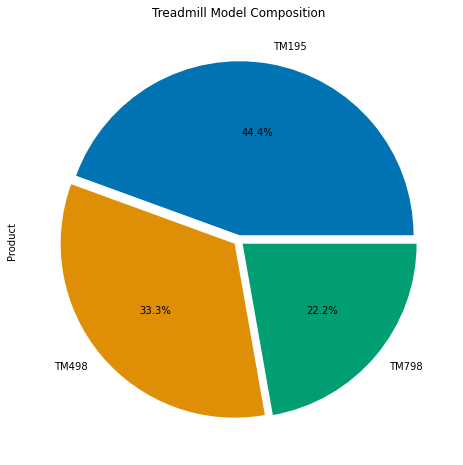

In [10]:
models_df.plot.pie(autopct='%.1f%%',figsize=(8,8),explode=[0.03]*3)
plt.title("Treadmill Model Composition")

- Treadmill TM195 is the highest selling model, composing of 44.4% of sales
- Treadmill Tm798 is the lowest selling mode, composing of 22.2% of sales

<b> 3.3 Which gender bought more treadmills? </b>

In [11]:
gender_df = CGF_df["Gender"].value_counts()

Text(0.5, 1.0, 'Treadmill Gender Composition')

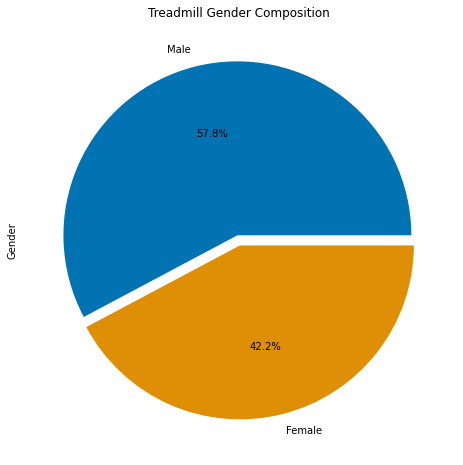

In [12]:
gender_df.plot.pie(autopct='%.1f%%',figsize=(8,8),explode=[0.03]*2)
plt.title("Treadmill Gender Composition")

<b> 3.4 Did partnered or single people buy more treadmills? </b>

In [13]:
partner_df = CGF_df["MaritalStatus"].value_counts()

Text(0.5, 1.0, 'Treadmill Marital Status Composition')

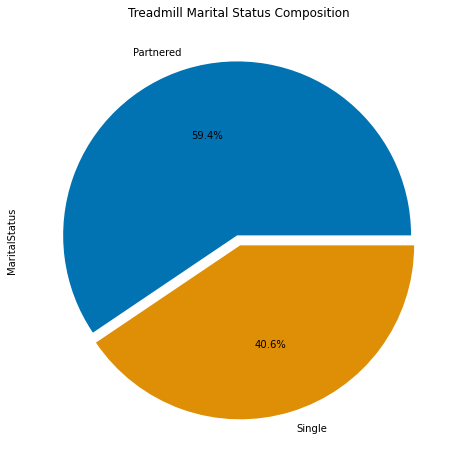

In [14]:
partner_df.plot.pie(autopct='%.1f%%',figsize=(8,8),explode=[0.03]*2)
plt.title("Treadmill Marital Status Composition")

<b>3.5 Distribution of continuous data groups</b>

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

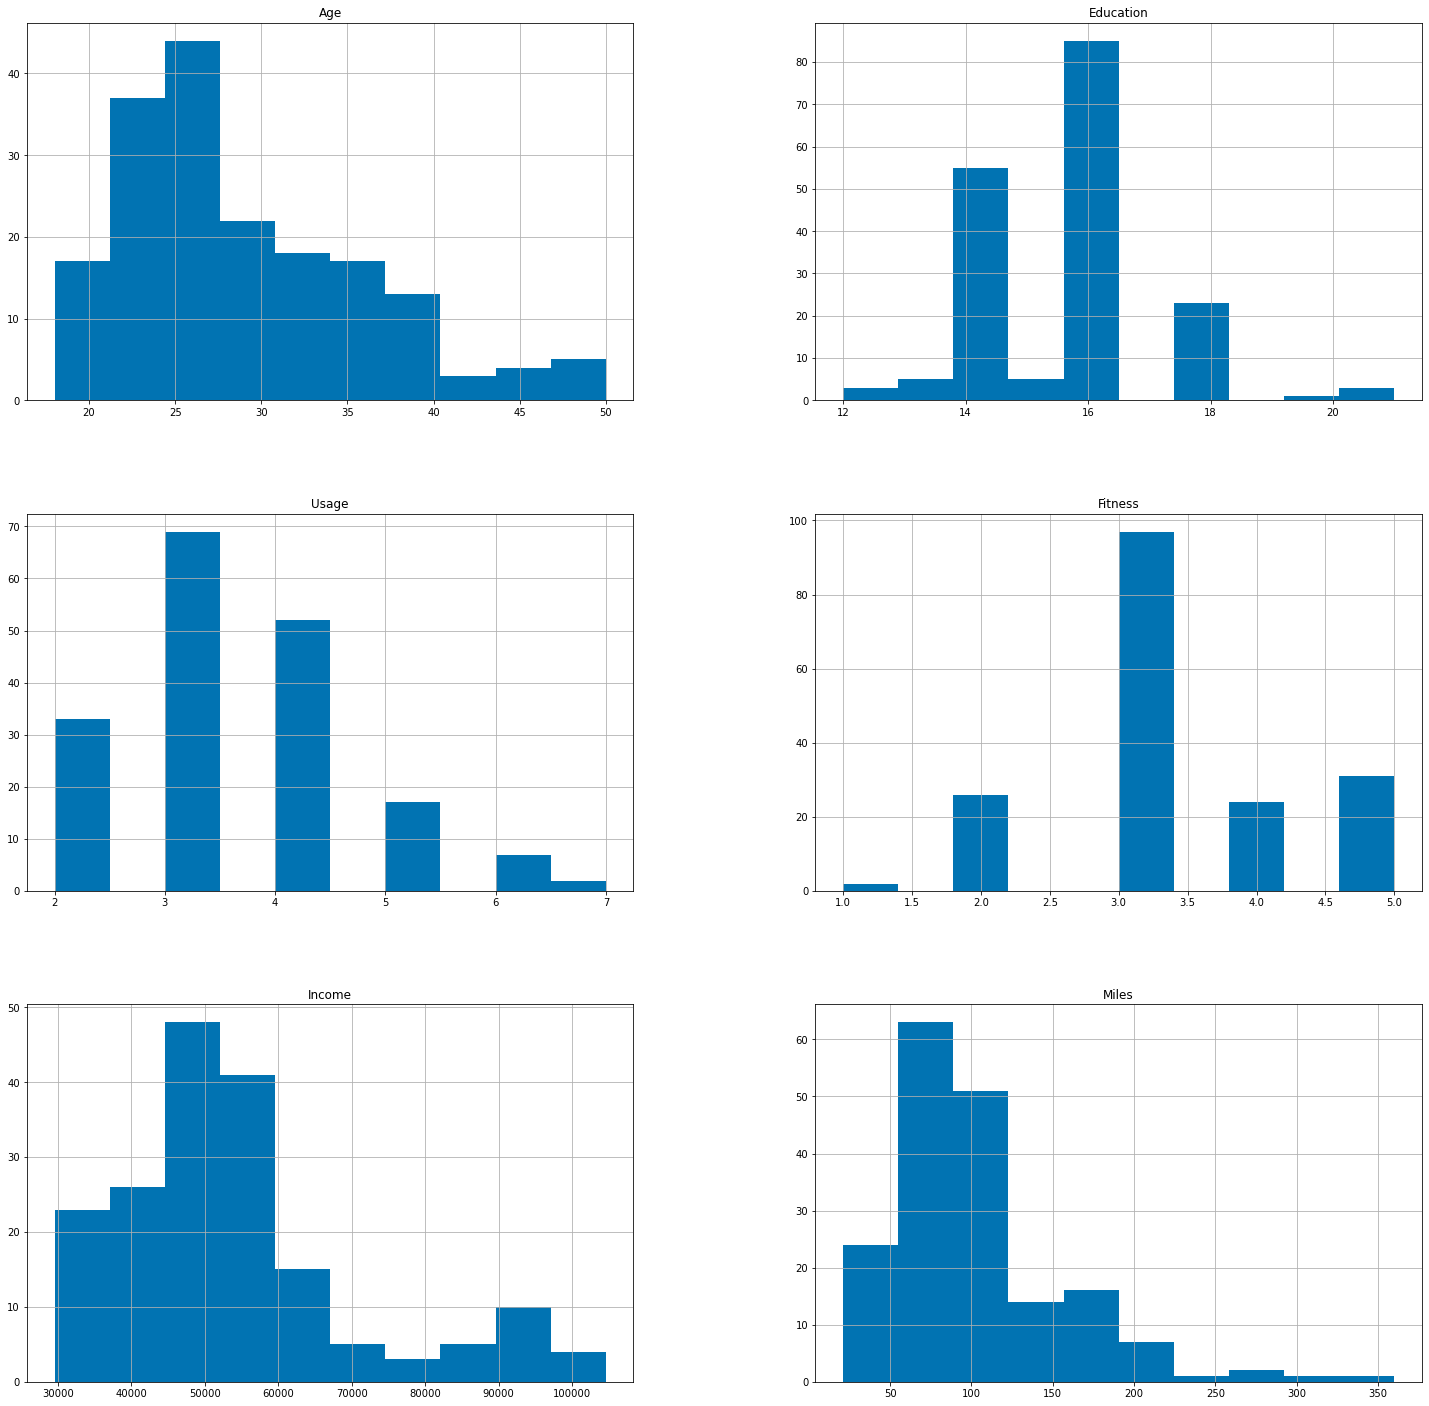

In [15]:
CGF_df.hist(figsize=(25,25))

## 4. Bivariate Analysis

<b> 4.1 Product purchases by gender </b>

<AxesSubplot:xlabel='Gender', ylabel='count'>

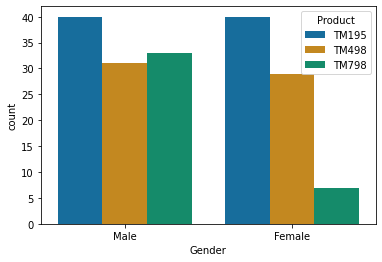

In [16]:
sns.countplot(x='Gender',hue="Product",data=CGF_df)

- Female purchasing TM798 is much lower than males

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

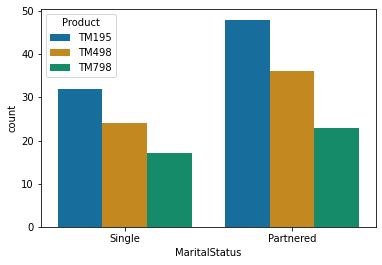

In [17]:
sns.countplot(x='MaritalStatus',hue="Product",data=CGF_df)

<b> 4.2 Age distribution by gender </b>

<AxesSubplot:xlabel='Gender', ylabel='Age'>

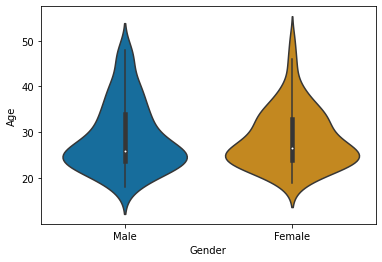

In [18]:
sns.violinplot(x="Gender",y="Age", data=CGF_df)

<b> 4.3 Age distribution by model </b>

Text(0.5, 1.0, 'Age distributions for each Treadmill Model')

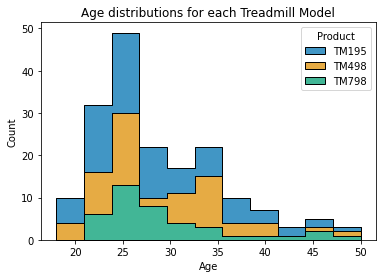

In [19]:
sns.histplot(CGF_df, x="Age", hue="Product", element = "step",multiple="stack")

plt.title('Age distributions for each Treadmill Model')

<AxesSubplot:xlabel='Product', ylabel='Age'>

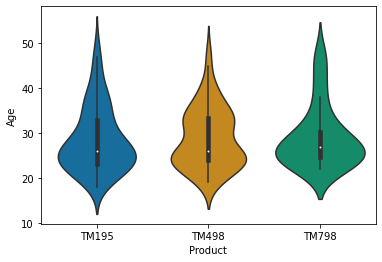

In [20]:
sns.violinplot(x="Product",y="Age", data=CGF_df)

In [21]:
col_stats("Age","Product")

Age                    
          max   mean median   min
Product                          
TM195    50.0  28.55   26.0  18.0
TM498    48.0  28.90   26.0  19.0
TM798    48.0  29.10   27.0  22.0

<b> 4.4 Years of education distribution by model </b>

<AxesSubplot:xlabel='Product', ylabel='Education'>

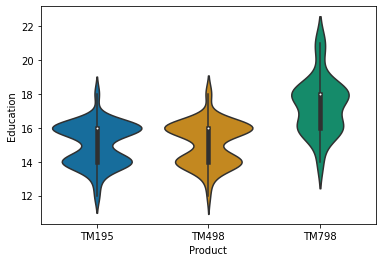

In [22]:
sns.violinplot(x="Product",y="Education", data=CGF_df)

In [23]:
col_stats("Education","Product")

Education                        
              max       mean median   min
Product                                  
TM195        18.0  15.037500   16.0  12.0
TM498        18.0  15.116667   16.0  12.0
TM798        21.0  17.325000   18.0  14.0

<b> 4.5 Income distribution by model </b>

<AxesSubplot:xlabel='Product', ylabel='Income'>

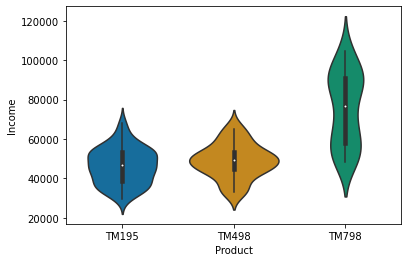

In [24]:
sns.violinplot(x="Product",y="Income", data=CGF_df)

In [25]:
col_stats("Income","Product")

Income                             
              max       mean   median      min
Product                                       
TM195     68220.0  46418.025  46617.0  29562.0
TM498     67083.0  48973.650  49459.5  31836.0
TM798    104581.0  75441.575  76568.5  48556.0

<b> 4.6 Expected miles traveled distribution by model </b>

<AxesSubplot:xlabel='Product', ylabel='Miles'>

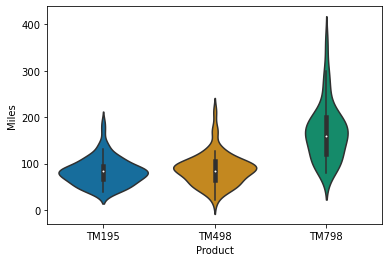

In [26]:
sns.violinplot(x="Product",y="Miles", data=CGF_df)

In [27]:
col_stats("Miles","Product")

Miles                         
           max        mean median   min
Product                                
TM195    188.0   82.787500   85.0  38.0
TM498    212.0   87.933333   85.0  21.0
TM798    360.0  166.900000  160.0  80.0

<b> 4.7 Expected weekly usage distribution by model </b>

<AxesSubplot:xlabel='Product', ylabel='Usage'>

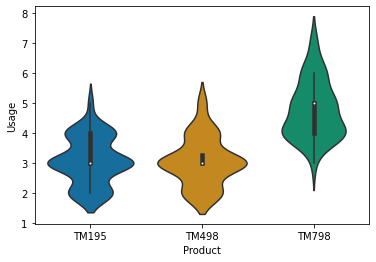

In [28]:
sns.violinplot(x="Product",y="Usage", data=CGF_df)

In [29]:
col_stats("Usage","Product")

Usage                      
          max      mean median  min
Product                            
TM195     5.0  3.087500    3.0  2.0
TM498     5.0  3.066667    3.0  2.0
TM798     7.0  4.775000    5.0  3.0

<b>4.8 Self-rated fitness distribution by model

<AxesSubplot:xlabel='Product', ylabel='Fitness'>

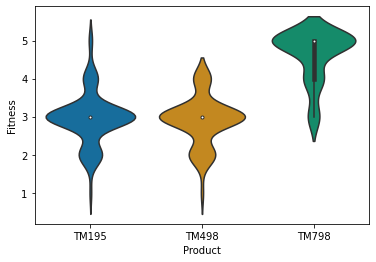

In [30]:
sns.violinplot(x="Product",y="Fitness", data=CGF_df)

In [31]:
col_stats("Fitness","Product")

Fitness                    
            max    mean median  min
Product                            
TM195       5.0  2.9625    3.0  1.0
TM498       4.0  2.9000    3.0  1.0
TM798       5.0  4.6250    5.0  3.0

- TM798 is favored by customers of many different characteristics:
    - higher education
    - higher income
    - higher expected miles traveled
    - higher expected weekly usage
    - higher self fitness rating

## 5. Multivariate Analysis

#### 5.1 Heatmap

<AxesSubplot:>

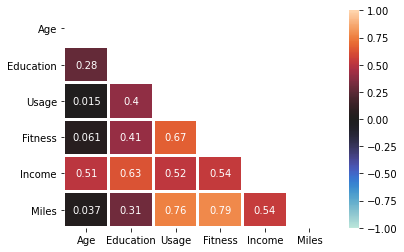

In [32]:
matrix = np.triu(CGF_df.corr())
sns.heatmap(CGF_df.corr(),annot=True,vmin=-1,vmax=1,center=0,linewidths=2,mask=matrix)

#### 5.2 Swarm plot of fitness, miles, and product

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

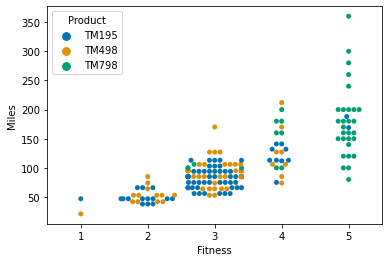

In [33]:
sns.swarmplot(data=CGF_df,x='Fitness',y='Miles',hue='Product')

Customers with higher expected miles and self fitness rating favored model TM798

#### 5.3 Swarm plot of education, income, and product

<AxesSubplot:xlabel='Education', ylabel='Income'>

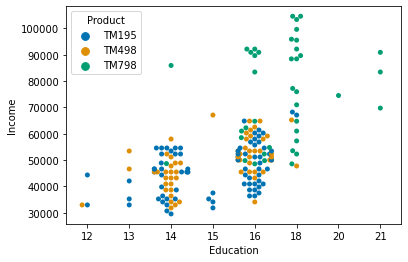

In [34]:
sns.swarmplot(data=CGF_df,x='Education',y='Income',hue='Product')

Customers with higher education and income favored model TM798 as well

## 6. Discussion

#### 6.1 TM195 Customer Profile

- TM195 is the most popular model, contributing to 44.4% of sales
- Partnered customers purchased this model more than single
- Mean age is 28.55 (youngest but not by much), median is 26, has oldest customers at 50.
- Mean years of education is 15, median is 16 (probably bachelor's degree)
- Mean income is 46.4k, max no higher than 70k
- Mean expected miles traveled is 83 miles a week
- Normal fitness rating and usage

#### 6.2 TM498 Customer Profile

- TM498 is the second most sold model, contributing to 33.3% of sales
- Mean age is just under 29, median is 26
- Mean years of education is 15, median is 16 (probably bachelor's degree as well)
- Mean income is 49k, max no higher than 70k
- Mean expected miles traveled is 88 miles a week, lowest expected miles at 21. 
- Normal fitness rating and usage

#### 6.3 TM798 Customer Profile

- TM498 is the lowest most sold model, contributing to 22.2% of sales
- More popular among males
- Mean age is just over 29, median is 27, youngest customer is oldest by far (22 vs 19 and 18)
- Mean years of education is 17, median is 18 (probably bachelor's and master's degree, some type of advanced degree)
- Mean income is 75k, max is a bit over 100k
- Mean expected miles traveled is 166 miles a week, lowest expected miles at 80. 
- Higher fitness and usage rating, 5 times per week, and fitness rating 4-5

#### 6.4 Suggestions

- Market TM195 and TM498 models as consumer friendly/budget and beginner treadmills
- TM195 sales are lower in singles, find a way to tap into that market
- TM798 is clearly favored by those who have high income, market it as a premium product
- Find a way to boost TM798 sales, maybe with celebrity or athlete endorsement or sponsor athletic events
- Majority of treadmill sales are purchased by adults under 40, find a way to market to older population (walking focus, recapture youth, indoor training)